# 2012 美国选举数据

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import warnings
warnings.filterwarnings('ignore')

In [29]:
#为了直观的显示数字，不采用科学记数法
pd.set_option('display.float_format', lambda x : '%.4f' % x)

In [30]:
fec = pd.read_csv('C:\\Users\\choven\\Desktop\\pydata-book-2nd-edition\\datasets\\fec\\P00000001-ALL.csv')
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [31]:
#查看某条数据信息
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                     50.0000
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

---

### 建立字典映射党派关系

In [32]:
#获取全部候选人名单
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [33]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [34]:
#将党派添加为一个新列
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [35]:
#查看赞助及出资额的情况
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [36]:
#只显示赞助的及出资额为正的数据
fec = fec[fec.contb_receipt_amt > 0]

In [37]:
#只包含重要信息的子集，即obama和romney的竞选信息
fec_sub = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

---

## 根据职业和雇主统计赞助信息。基于职业的赞助信息统计

In [38]:
#获取赞助的职业及数量
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [43]:
#许多职业涉及相同的基本工作类型，清理数据
occ_mapping = {
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.' : 'CEO'
}
#dict.get允许没有映射关系的也能通过，如果没有提供相关映射，则返回x
f = lambda x: occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [44]:
#同理清理雇主数据
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED'
}
f = lambda x: emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [45]:
#根据党派和职业对数据进行聚合
by_occupation = fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
#过滤掉总出资额低于200万美元的数据
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.9700,7477194.4300
CEO,2074974.7900,4211040.5200
CONSULTANT,2459912.7100,2544725.4500
ENGINEER,951525.5500,1818373.7000
EXECUTIVE,1355161.0500,4138850.0900
HOMEMAKER,4248875.8000,13634275.7800
INVESTOR,884133.0000,2431768.9200
LAWYER,3160478.8700,391224.3200
MANAGER,762883.2200,1444532.3700


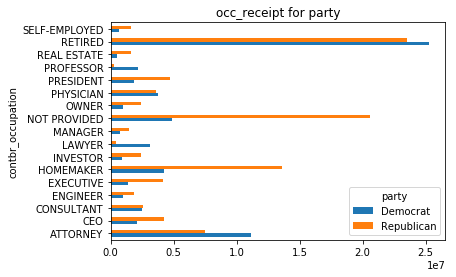

In [46]:
#柱状图
over_2mm.plot(kind='barh',title='occ_receipt for party')
plt.show()

---

## 分析对Obama和Romney总出资额最高的职业和企业

In [47]:
#求取最大值
def get_top_amounts(group,key,n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    #根据key对totals降序
    return totals.sort_values(ascending=False)[:n]

In [48]:
#根据候选人聚合，即是Obama和Romney
grouped = fec_sub.groupby('cand_nm')
#职业，前7个
occ_receipt_group = grouped.apply(get_top_amounts,'contbr_occupation',n=7)
#雇主，前7个
emp_receipt_group = grouped.apply(get_top_amounts,'contbr_employer',n=7)


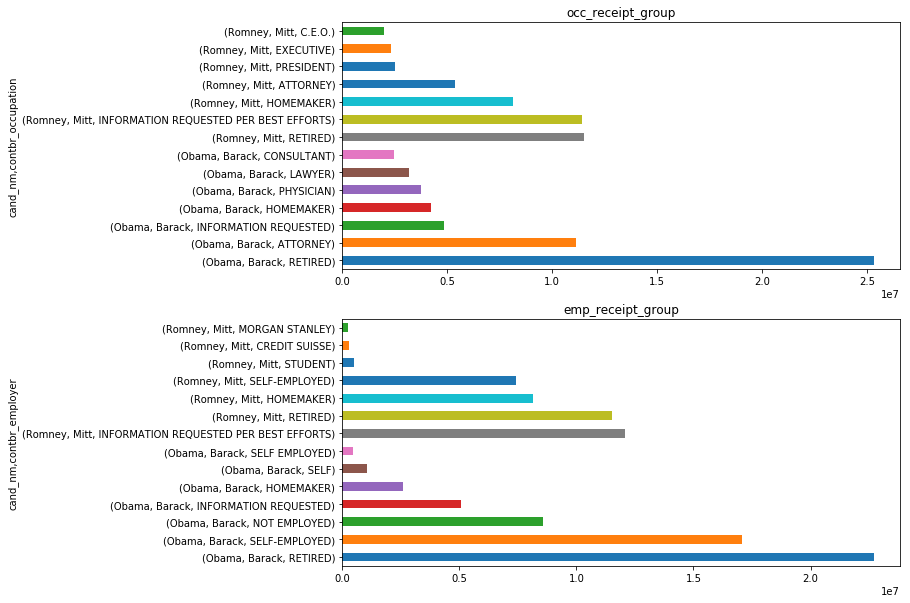

In [52]:
#画图
fig,axes = plt.subplots(2,1)
occ_receipt_group.plot(kind='barh',ax=axes[0],title='occ_receipt_group',figsize=(10,10))
emp_receipt_group.plot(kind='barh',ax=axes[1],title='emp_receipt_group',figsize=(10,10))
plt.show()

---

## 对出资额分组

### 分析两位候选人各种赞助额的比例

In [55]:
#利用cut函数根据出资额的大小将数据离散化到多个面元中
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(fec_sub.contb_receipt_amt,bins)
labels[:10]

411      (10, 100]
412    (100, 1000]
413    (100, 1000]
414      (10, 100]
415      (10, 100]
416      (10, 100]
417    (100, 1000]
418      (10, 100]
419    (100, 1000]
420      (10, 100]
Name: contb_receipt_amt, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [56]:
#面元标签
#根据候选人和面元标签对数据分组
grouped = fec_sub.groupby(['cand_nm',labels])
print(grouped.size().unstack(0))

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                    493.0000       77.0000
(1, 10]                 40070.0000     3681.0000
(10, 100]              372280.0000    31853.0000
(100, 1000]            153991.0000    43357.0000
(1000, 10000]           22284.0000    26186.0000
(10000, 100000]             2.0000        1.0000
(100000, 1000000]           3.0000           nan
(1000000, 10000000]         4.0000           nan


In [58]:
#对出资额求和，并在面元内规格化
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.2400,77.0000
"(1, 10]",337267.6200,29819.6600
"(10, 100]",20288981.4100,1987783.7600
"(100, 1000]",54798531.4600,22363381.6900
"(1000, 10000]",51753705.6700,63942145.4200
"(10000, 100000]",59100.0000,12700.0000
"(100000, 1000000]",1490683.0800,nan
"(1000000, 10000000]",7148839.7600,nan


In [59]:
#将得到的数据按比例
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.8052,0.1948
"(1, 10]",0.9188,0.0812
"(10, 100]",0.9108,0.0892
"(100, 1000]",0.7102,0.2898
"(1000, 10000]",0.4473,0.5527
"(10000, 100000]",0.8231,0.1769
"(100000, 1000000]",1.0000,nan
"(1000000, 10000000]",1.0000,nan


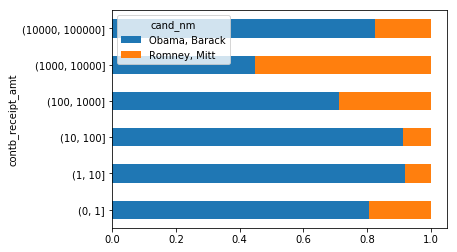

In [60]:
#排除两个最大的
normed_sums[:-2].plot(kind='barh',stacked=True)
plt.show()

---

## 根据州统计赞助信息

In [62]:
#根据候选人和州对数据聚合
grouped = fec_sub.groupby(['cand_nm','contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
#print(totals)
#各行除以总赞助额，得到各候选人在各州的总赞助额比例
percent = totals.div(totals.sum(1),axis=0)    #跟sum(axis=1)一样
print(percent[:10])

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK                0.7658        0.2342
AL                0.5074        0.4926
AR                0.7729        0.2271
AZ                0.4437        0.5563
CA                0.6795        0.3205
CO                0.5860        0.4140
CT                0.3715        0.6285
DC                0.8101        0.1899
DE                0.8028        0.1972
FL                0.4674        0.5326
